<a href="https://colab.research.google.com/github/rphl15/rphl15/blob/main/analise_exploratoria_carros_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados – Mercado de Carros (Python)

Este notebook realiza uma **Análise Exploratória de Dados (AED)** sobre um conjunto de dados de carros,
atendendo aos requisitos da disciplina **Análise Exploratória de Dados**.

## Objetivos principais
- Explorar a estrutura dos dados
- Verificar dados ausentes e possíveis outliers
- Calcular estatísticas descritivas
- Produzir visualizações (histograma, boxplot, scatter plot, mapa de calor)
- Investigar relações entre variáveis numéricas
- Apresentar uma conclusão com os principais insights

### Referência externa utilizada
Parte da inspiração para a organização desta análise veio do notebook:

[And Pereira – Portuguese Car Market Analysis (Kaggle)](https://www.kaggle.com/code/andpereira/portuguese-car-market-analysis)

_Acessado em 18/11/2025._


## 1. Importação de bibliotecas e carregamento dos dados

Certifique-se de que o arquivo
`market_analysis_cars_nov2025.csv` está na **mesma pasta** deste notebook.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Carregar a base de dados
dados = pd.read_csv('market_analysis_cars_nov2025.csv')

# Visualizar as primeiras linhas
dados.head()

,index,title,price,currency,year,mileage,fuel,transmission,displacement,horsepower,location
0,1,Peugeot 208 1.2 PureTech Style,11500.0,EUR,2016,90199.0,Gasoline,Manual,1199.0,82.0,Vila Nova de Gaia (Porto)
1,2,Toyota Yaris 1.33 VVT-i Comfort+P.Style,14500.0,EUR,2016,77063.0,Gasoline,Manual,1329.0,99.0,Rio de Mouro (Lisboa)
2,3,Nissan Micra 1.2 Acenta,11900.0,EUR,2016,47863.0,Gasoline,Manual,1198.0,80.0,Vila Nova de Gaia (Porto)
3,4,Nissan Micra,13500.0,EUR,2018,78911.0,Gasoline,Manual,898.0,90.0,Vila Nova de Gaia (Porto)
4,5,BMW 216 Gran Coupé d Pack Desportivo M,31500.0,EUR,2021,98306.0,Diesel,Automatic,1496.0,116.0,Vila Nova de Gaia (Porto)


## 2. Exploração inicial dos dados

Nesta etapa vamos:
- Descrever as variáveis
- Verificar tipos de dados
- Procurar dados ausentes
- Ter uma primeira visão geral do conjunto


In [17]:
# Informações gerais do dataset
dados.info()

# Estatísticas descritivas numéricas
dados.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37529 entries, 0 to 37528
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         37529 non-null  int64  
 1   title         37529 non-null  object 
 2   price         37529 non-null  float64
 3   currency      37529 non-null  object 
 4   year          37529 non-null  int64  
 5   mileage       37528 non-null  float64
 6   fuel          37529 non-null  object 
 7   transmission  37379 non-null  object 
 8   displacement  37529 non-null  float64
 9   horsepower    37529 non-null  float64
 10  location      37529 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 3.1+ MB


,index,price,year,mileage,displacement,horsepower
count,37529.000000,37529.000000,37529.000000,37528.000000,37529.000000,37529.000000
mean,18765.000000,25161.521570,2017.581257,112621.733106,1652.103040,157.004796
std,10833.833463,28306.827876,6.855018,82251.018062,665.390447,104.232872
min,1.000000,500.000000,1950.000000,0.000000,400.000000,2.000000
25%,9383.000000,12850.000000,2015.000000,47900.000000,1199.000000,101.000000
50%,18765.000000,18750.000000,2019.000000,97949.500000,1499.000000,122.000000
75%,28147.000000,27990.000000,2022.000000,160000.000000,1969.000000,184.000000
max,37529.000000,500000.000000,2025.000000,1000000.000000,8300.000000,8300.000000


In [18]:
# Contagem de valores ausentes por coluna
dados.isna().sum()

,0
index,0
title,0
price,0
currency,0
year,0
mileage,1
fuel,0
transmission,150
displacement,0
horsepower,0


### Comentários sobre a exploração inicial

- As variáveis numéricas principais incluem, por exemplo: `price`, `year`, `mileage`, `displacement`, `horsepower` (ajuste conforme as colunas reais).
- As variáveis categóricas podem incluir: `title` (modelo do carro), `currency`, `fuel`, `transmission`, `location`, etc.
- A contagem de valores ausentes indica quais colunas exigem atenção em relação a limpeza e possíveis imputações.

_Após executar as células acima, complete essa análise descrevendo o que observou nos dados._


## 3. Verificação de outliers

Vamos investigar outliers nas principais variáveis numéricas utilizando o critério do IQR (Intervalo Interquartil) e também visualizar com boxplots.


In [19]:
# Selecionar apenas colunas numéricas
dados_num = dados.select_dtypes(include=[np.number])
dados_num.columns

Index(['index', 'price', 'year', 'mileage', 'displacement', 'horsepower'], dtype='object')

In [20]:
def detectar_outliers_iqr(serie):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]
    return outliers

# Detectar outliers em cada variável numérica
outliers_dict = {}
for col in dados_num.columns:
    outliers_dict[col] = detectar_outliers_iqr(dados_num[col])

outliers_dict

{'index': Series([], Name: index, dtype: int64),
 'price': 17        62500.0
 29        72000.0
 41        65000.0
 42       214950.0
 69        69000.0
            ...   
 37335     72990.0
 37393     95000.0
 37410     58990.0
 37484     55900.0
 37525    118900.0
 Name: price, Length: 2701, dtype: float64,
 'year': 28       2004
 33       2002
 89       2003
 151      1985
 157      2003
          ... 
 37495    2002
 37499    2004
 37508    2000
 37516    1995
 37521    1993
 Name: year, Length: 1574, dtype: int64,
 'mileage': 28       472299.0
 232      401000.0
 521      500000.0
 528      350000.0
 923      370000.0
            ...   
 37394    511000.0
 37396    334000.0
 37402    340000.0
 37437    379000.0
 37495    457000.0
 Name: mileage, Length: 650, dtype: float64,
 'displacement': 27       4395.0
 28       3222.0
 41       4663.0
 42       3982.0
 119      3800.0
           ...  
 37137    4973.0
 37140    3387.0
 37239    3600.0
 37354    3222.0
 37376    3222.0
 Name: 

### Comentários sobre outliers

- O dicionário acima mostra os valores considerados outliers em cada variável numérica.
- É comum encontrar valores muito altos de `price` ou `mileage` como possíveis outliers.
- Você deve analisar se esses valores fazem sentido no contexto real (por exemplo, carros de luxo muito caros ou veículos muito rodados).


## 4. Resumo estatístico detalhado

Agora vamos calcular medidas como média, mediana, mínimo, máximo, quartis e desvio padrão para as variáveis numéricas.


In [21]:
resumo = pd.DataFrame(index=dados_num.columns)
resumo['media'] = dados_num.mean()
resumo['mediana'] = dados_num.median()
resumo['minimo'] = dados_num.min()
resumo['maximo'] = dados_num.max()
resumo['desvio_padrao'] = dados_num.std()
resumo['q1'] = dados_num.quantile(0.25)
resumo['q3'] = dados_num.quantile(0.75)

resumo

,media,mediana,minimo,maximo,desvio_padrao,q1,q3
index,18765.000000,18765.0,1.0,37529.0,10833.833463,9383.0,28147.0
price,25161.521570,18750.0,500.0,500000.0,28306.827876,12850.0,27990.0
year,2017.581257,2019.0,1950.0,2025.0,6.855018,2015.0,2022.0
mileage,112621.733106,97949.5,0.0,1000000.0,82251.018062,47900.0,160000.0
displacement,1652.103040,1499.0,400.0,8300.0,665.390447,1199.0,1969.0
horsepower,157.004796,122.0,2.0,8300.0,104.232872,101.0,184.0


In [22]:
def moda(serie):
    return serie.mode().iloc[0] if not serie.mode().empty else np.nan

modas = dados_num.apply(moda)
modas

,0
index,1.0
price,19990.0
year,2024.0
mileage,1.0
displacement,999.0
horsepower,110.0


### Comentários sobre o resumo estatístico

- A média e a mediana de `price` indicam o valor típico dos carros no conjunto analisado.
- O desvio padrão mostra o quanto os valores se afastam da média.
- Os quartis (Q1 e Q3), assim como mínimo e máximo, ajudam a entender a dispersão e possíveis assimetrias na distribuição.
- A moda pode indicar valores mais frequentes em determinadas variáveis numéricas.


## 5. Visualização de dados

Criaremos pelo menos 3 gráficos, incluindo:
- Histograma
- Boxplot
- Gráfico de dispersão (scatter plot)
- Mapa de calor da correlação (para complementar a análise)


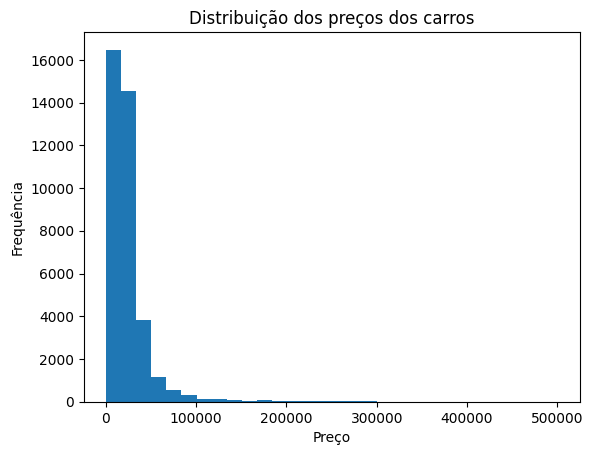

In [23]:
# 5.1 Histograma do preço dos carros
plt.figure()
plt.hist(dados['price'].dropna(), bins=30)
plt.title('Distribuição dos preços dos carros')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

<Figure size 640x480 with 0 Axes>

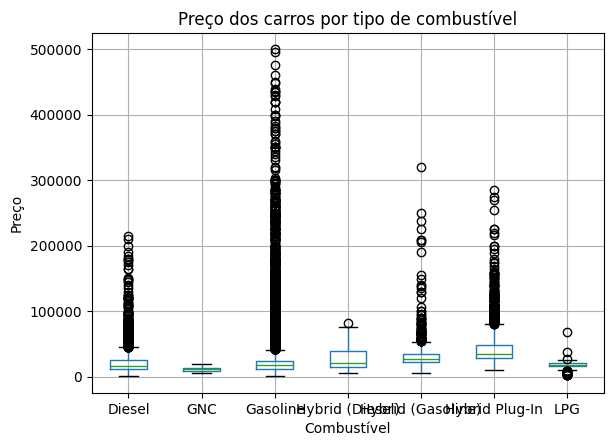

In [24]:
# 5.2 Boxplot do preço por tipo de combustível (se a coluna existir)
if 'fuel' in dados.columns:
    plt.figure()
    dados.boxplot(column='price', by='fuel')
    plt.title('Preço dos carros por tipo de combustível')
    plt.suptitle('')  # remove o título automático do pandas
    plt.xlabel('Combustível')
    plt.ylabel('Preço')
    plt.show()
else:
    print('Coluna fuel não encontrada no dataset.')

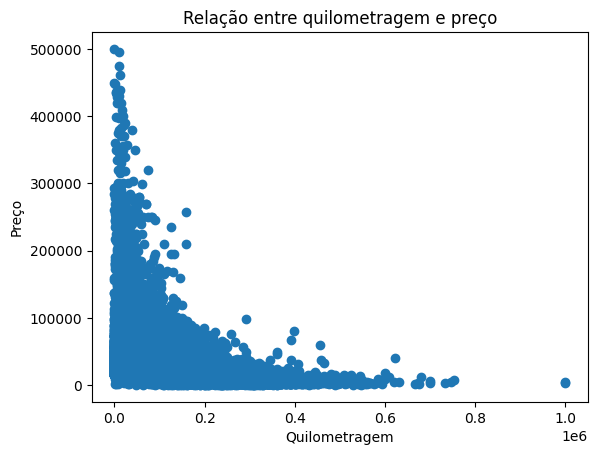

In [25]:
# 5.3 Gráfico de dispersão: preço x quilometragem (se a coluna existir)
if 'mileage' in dados.columns:
    plt.figure()
    plt.scatter(dados['mileage'], dados['price'])
    plt.title('Relação entre quilometragem e preço')
    plt.xlabel('Quilometragem')
    plt.ylabel('Preço')
    plt.show()
else:
    print('Coluna mileage não encontrada no dataset.')

### Comentários sobre as visualizações

- O histograma permite observar a forma da distribuição dos preços (se é concentrada, assimétrica, etc.).
- O boxplot por tipo de combustível ajuda a comparar a distribuição de preços entre diferentes categorias.
- O gráfico de dispersão (scatter) entre quilometragem e preço possibilita avaliar se carros mais rodados tendem a ser mais baratos.


## 6. Relações entre variáveis (correlação)

Nesta etapa vamos calcular a matriz de correlação entre variáveis numéricas e visualizar um mapa de calor simples.


In [26]:
# Matriz de correlação
cor_mat = dados_num.corr()
cor_mat

,index,price,year,mileage,displacement,horsepower
index,1.000000,-0.055539,-0.075260,0.056491,-0.020843,-0.033714
price,-0.055539,1.000000,0.169927,-0.313806,0.606707,0.693170
year,-0.075260,0.169927,1.000000,-0.590715,-0.263453,0.054375
mileage,0.056491,-0.313806,-0.590715,1.000000,0.182533,-0.088455
displacement,-0.020843,0.606707,-0.263453,0.182533,1.000000,0.701361
horsepower,-0.033714,0.693170,0.054375,-0.088455,0.701361,1.000000


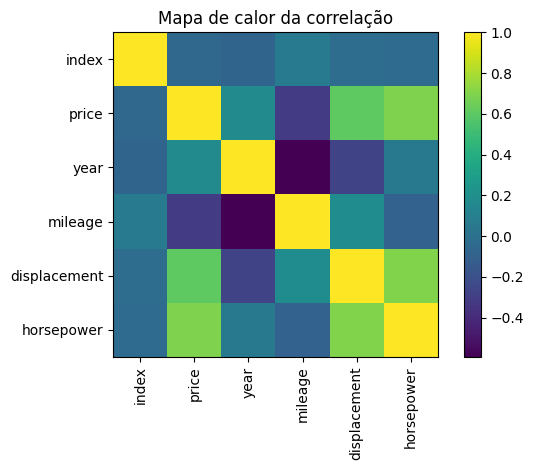

In [27]:
# Mapa de calor simples da matriz de correlação
plt.figure()
plt.imshow(cor_mat, interpolation='nearest')
plt.title('Mapa de calor da correlação')
plt.xticks(range(len(cor_mat)), cor_mat.columns, rotation=90)
plt.yticks(range(len(cor_mat)), cor_mat.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

In [28]:
# Correlações específicas (se as colunas existirem)
if set(['price', 'mileage']).issubset(dados.columns):
    cor_price_mileage = dados['price'].corr(dados['mileage'])
    print('Correlação entre preço e quilometragem:', cor_price_mileage)
else:
    print('Colunas price e/ou mileage não encontradas.')

if set(['price', 'year']).issubset(dados.columns):
    cor_price_year = dados['price'].corr(dados['year'])
    print('Correlação entre preço e ano:', cor_price_year)
else:
    print('Colunas price e/ou year não encontradas.')

Correlação entre preço e quilometragem: -0.3138063943828947
Correlação entre preço e ano: 0.1699268283713535


### Comentários sobre correlação

- A matriz de correlação mostra a força e a direção da relação entre as variáveis numéricas.
- Valores próximos de 1 indicam forte correlação positiva; próximos de -1, forte correlação negativa.
- Normalmente, espera-se correlação negativa entre `price` e `mileage` (carros mais rodados tendem a ser mais baratos) e positiva entre `price` e `year` (carros mais novos tendem a ser mais caros).


## 7. Conclusão

Nesta seção, você deve resumir os principais padrões, anomalias e relações identificadas ao longo da análise.

Um exemplo de estrutura de conclusão (substitua pelos seus resultados reais):

- Os dados analisados apresentam veículos com ampla variação de preço, ano de fabricação e quilometragem.
- Observou-se que a maioria dos preços se concentra na faixa de _X_ a _Y_, com alguns outliers representando carros muito caros ou muito baratos.
- Carros com maior quilometragem tendem a ter preço menor, sugerindo uma correlação negativa entre essas variáveis.
- Carros mais novos, em geral, apresentam preços mais altos, o que indica uma correlação positiva entre ano de fabricação e preço.
- Diferenças de preço também podem ser notadas entre tipos de combustível, sugerindo variações associadas à tecnologia ou ao posicionamento de mercado.

De forma geral, a Análise Exploratória de Dados permitiu compreender melhor o comportamento do mercado de carros representado neste conjunto de dados e forneceu insights que podem ser úteis em estudos de precificação, revenda ou recomendação de veículos.
